In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Explore Data

In [2]:
titanic_full = pd.read_csv('./data/train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('./data/test.csv', index_col='PassengerId')
titanic_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<AxesSubplot:ylabel='PassengerId'>

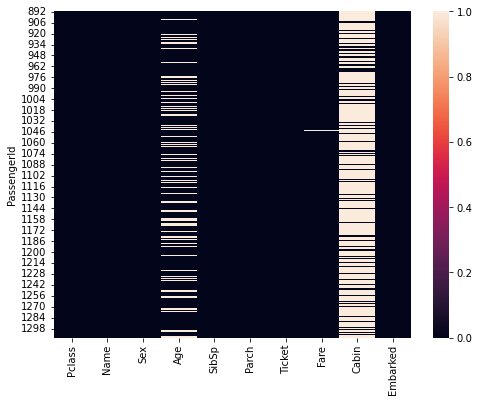

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_test.isna())

In [6]:
titanic_full.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Select Target

In [7]:
y = titanic_full['Survived']
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Drop Unnecessry Columns

In [8]:
drop_cols = ['Name', 'Cabin', 'Ticket', ]
titanic_full.drop(columns=drop_cols + ['Survived'], inplace=True)
titanic_test.drop(columns=drop_cols, inplace=True)

### Select Features

In [9]:
num_cols = ['Age', 'Fare']
cat_cols = ['Sex', 'Embarked']
ord_cols = ['Pclass', 'SibSp', 'Parch']

print("Categorical Columns:", cat_cols)
print("Numerical Columns  :", num_cols)
print("Ordinal Columns    :", ord_cols)

Categorical Columns: ['Sex', 'Embarked']
Numerical Columns  : ['Age', 'Fare']
Ordinal Columns    : ['Pclass', 'SibSp', 'Parch']


In [10]:
X = titanic_full[cat_cols + num_cols + ord_cols]
X.head()

,Sex,Embarked,Age,Fare,Pclass,SibSp,Parch
PassengerId,,,,,,,
1,male,S,22.0,7.2500,3,1,0
2,female,C,38.0,71.2833,1,1,0
3,female,S,26.0,7.9250,3,0,0
4,female,S,35.0,53.1000,1,1,0
5,male,S,35.0,8.0500,3,0,0


### Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [12]:
print("X train : ", X_train.shape)
print("X test  : ", X_val.shape)
print("\ny train : ", y_train.shape)
print("y test  : ", y_val.shape)

X train :  (712, 7)
X test  :  (179, 7)

y train :  (712,)
y test  :  (179,)


### Define Preprocessing Steps

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')), 
    ('encode', OneHotEncoder(handle_unknown='ignore',sparse=False))
])
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_transformer, num_cols),
    ('categorical', cat_transformer, cat_cols)
], remainder='passthrough')

### Build Model using Neural Network

In [15]:
from tensorflow.keras import *

In [16]:
model = Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1


2022-02-27 20:46:10.312155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-27 20:46:10.312234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

### Create Pipeline

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

### Fit on Training Data

In [19]:
pipeline.fit(X_train, y_train, model__epochs=500)

2022-02-27 20:46:10.362528: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/500


2022-02-27 20:46:10.554280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 6ms/step - loss: 0.7792 - acc: 0.5435
Epoch 2/500
23/23 [==============================] - 0s 5ms/step - loss: 0.5427 - acc: 0.7261
Epoch 3/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4830 - acc: 0.7949
Epoch 4/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4537 - acc: 0.8048
Epoch 5/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4316 - acc: 0.8132
Epoch 6/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4225 - acc: 0.8216
Epoch 7/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4340 - acc: 0.8202
Epoch 8/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4153 - acc: 0.8301
Epoch 9/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4123 - acc: 0.8287
Epoch 10/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4033 - acc: 0.8441
Epoch 11/500
23/23 [==============================] - 0s 5ms/step - los

23/23 [==============================] - 0s 5ms/step - loss: 0.3248 - acc: 0.8666
Epoch 88/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3244 - acc: 0.8624
Epoch 89/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3277 - acc: 0.8652
Epoch 90/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3208 - acc: 0.8610
Epoch 91/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3301 - acc: 0.8708
Epoch 92/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3249 - acc: 0.8708
Epoch 93/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3329 - acc: 0.8652
Epoch 94/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3350 - acc: 0.8652
Epoch 95/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3333 - acc: 0.8652
Epoch 96/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3272 - acc: 0.8736
Epoch 97/500
23/23 [==============================] - 0s 5ms/st

23/23 [==============================] - 0s 5ms/step - loss: 0.2937 - acc: 0.8764
Epoch 173/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2879 - acc: 0.8848
Epoch 174/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2856 - acc: 0.8792
Epoch 175/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2836 - acc: 0.8778
Epoch 176/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2913 - acc: 0.8834
Epoch 177/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2958 - acc: 0.8778
Epoch 178/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2866 - acc: 0.8876
Epoch 179/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2961 - acc: 0.8834
Epoch 180/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2920 - acc: 0.8848
Epoch 181/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3242 - acc: 0.8624
Epoch 182/500
23/23 [==============================] -

23/23 [==============================] - 0s 5ms/step - loss: 0.2914 - acc: 0.8778
Epoch 258/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2835 - acc: 0.8806
Epoch 259/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2715 - acc: 0.8848
Epoch 260/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2746 - acc: 0.8778
Epoch 261/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2822 - acc: 0.8778
Epoch 262/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2863 - acc: 0.8708
Epoch 263/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2913 - acc: 0.8806
Epoch 264/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2882 - acc: 0.8736
Epoch 265/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2643 - acc: 0.8862
Epoch 266/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2701 - acc: 0.8848
Epoch 267/500
23/23 [==============================] -

23/23 [==============================] - 0s 5ms/step - loss: 0.2701 - acc: 0.8862
Epoch 343/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2706 - acc: 0.8876
Epoch 344/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2563 - acc: 0.8904
Epoch 345/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2565 - acc: 0.8904
Epoch 346/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2559 - acc: 0.8947
Epoch 347/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2663 - acc: 0.8904
Epoch 348/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2607 - acc: 0.8876
Epoch 349/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2530 - acc: 0.8933
Epoch 350/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2569 - acc: 0.8961
Epoch 351/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2554 - acc: 0.8947
Epoch 352/500
23/23 [==============================] -

23/23 [==============================] - 0s 5ms/step - loss: 0.2674 - acc: 0.8834
Epoch 428/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2450 - acc: 0.8975
Epoch 429/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2525 - acc: 0.8989
Epoch 430/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2608 - acc: 0.8933
Epoch 431/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2496 - acc: 0.9017
Epoch 432/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2470 - acc: 0.8989
Epoch 433/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2543 - acc: 0.8904
Epoch 434/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2395 - acc: 0.9045
Epoch 435/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2630 - acc: 0.8890
Epoch 436/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2575 - acc: 0.8933
Epoch 437/500
23/23 [==============================] -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
     

### Evaluate Model

In [25]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = (pipeline.predict(X_val) > 0.5).ravel().astype(int)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

In [31]:
accuracy_score(y_val, y_pred)

0.8100558659217877

### Predict on Test Data

In [32]:
predictions = (pipeline.predict(titanic_test) > 0.5).ravel().astype(int)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Create Submissions

In [33]:
submission = pd.DataFrame({'PassengerId': titanic_test.index, 'Survived': predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [34]:
submission.to_csv('data/submission.csv', index=False)

---